0 0.0 0.1 0.0


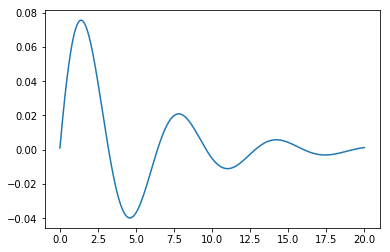

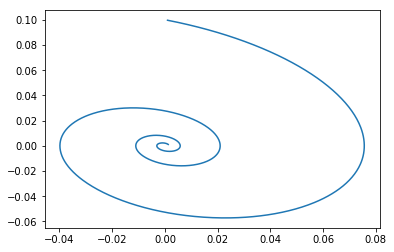

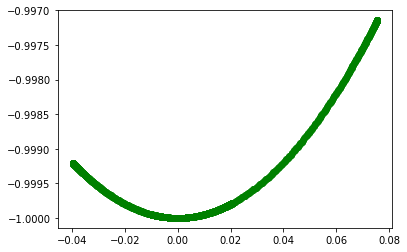

In [46]:
import sys, math
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Global parameters.

t_list = []
theta_list = []
x_list = []
y_list = []
v_list = []

X0 = 0.0
V0 = 0.1
K  = 1.0
DT = 0.01
TMAX = 20.0

a = .4
g = 0
w = 0

#-------------------------------------------------------------------------

def acc(x, v, t):
    return -K*math.sin(x) - a*v + g*math.cos(w*t)

def potential(x):
    return K*(1-math.cos(x))

def energy(x, v):
    return potential(x) + 0.5*v*v

#-------------------------------------------------------------------------

def output(x, v, t):
    print (t, x, v, energy(x, v) - E0)

def time_to_stop(x, v, t, tmax):
    
    # Stopping condition.
    
    if t > tmax:
        return 1
    else:
        return 0

def take_a_step(x, v, t, dt):
    
    # Take a single time step.
    
    a = acc(x, v, t)
    
    # Prediction:
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt
    
    # Correction:
    a1 = acc(x, v, t)
    v += 0.5*dt*(a1-a)

    return x,v,t

def animate(i):
    x_list.append(1*math.sin(x))
    y_list.append(1*math.cos(x))
    line.set_data(x_list, y_list)
    return line,
    
def ani_init():
    line.set_data([], [])
    return line, 
# Declaration and initialization.

t = 0
x = X0
v = V0
tmax = TMAX
dt = DT

E0 = energy(x, v)
output(x, v, t)

# fig = plt.figure()
# line, = plt.plot([], [])

# Integrate the motion.

while time_to_stop(x, v, t, tmax) == 0:
    
    (x,v,t) = take_a_step(x, v, t, dt)
    theta_list.append(x)
    x_list.append(1*math.sin(x))
    y_list.append(-1*math.cos(x))
    v_list.append(v)
    t_list.append(t)
    #output(x, v, t)
    
plt.figure()
plt.plot(t_list, theta_list)

plt.figure()
plt.plot(theta_list, v_list)


# ani = animation.FuncAnimation(fig, animate, init_func = ani_init, frames = 200, interval = 20)
# plt.show()
plt.figure()
plt.plot(x_list, y_list, 'go')
    
